In [1]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import stats as stats
from skimage import feature
from skimage.feature import greycoprops,greycomatrix
import os
import skimage.measure
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Activation
from keras import layers
import tensorflow as tf
from keras.models import load_model

In [2]:
model=load_model('model.h5')

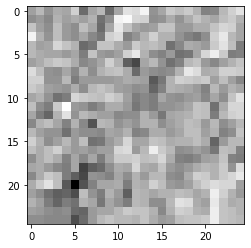

In [45]:
img=cv2.imread('dataset/testCrop/unaffected-1.jpg')
#mild4 severe3
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap='gray')

In [46]:
rows=[]
coeffs=pywt.wavedec(img, 'db1',level=1)
cA=coeffs[0]
cA = cA / cA.max()
cA = 255 * cA 
cA=cA.astype(np.uint8)
g=greycomatrix(cA,[1],[0],normed=True)
temp=[np.mean(greycoprops(g, 'energy')),skimage.measure.shannon_entropy(g),np.mean(greycoprops(g, 'contrast')),np.mean(greycoprops(g, 'dissimilarity')),np.mean(greycoprops(g, 'homogeneity')),np.mean(greycoprops(g, 'correlation')),np.mean(greycoprops(g, 'ASM'))]
rows.append(temp)
rows=np.array(rows)
print(rows.shape)
rows = rows.reshape(-1,1,7,1)
print(rows[0][0])

(1, 7)
[[6.92820323e-02]
 [3.82537954e-02]
 [9.46366667e+01]
 [7.64333333e+00]
 [1.27828154e-01]
 [1.84643786e-01]
 [4.80000000e-03]]


In [47]:
prediction = model.predict(rows)
np.argmax(prediction)

0